In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_name = "aapl.csv"

In [24]:
def get_data(file_name):
    stock = pd.read_csv(file_name,header=0, index_col=0, parse_dates=True, na_values=-99.99)
    #print(stock)
    return stock

def get_stock_returns(data, return_type="D"):
    if return_type == "D":
        stock_returns = data['Adj Close'].pct_change()
    else:
        stock_returns = data['Adj Close'].resample('M').ffill().pct_change()
        stock_returns.index = stock_returns.index.to_period('M')
    return stock_returns

In [52]:
def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})


In [31]:
stock = get_data(file_name)
# compute monthly returns
returns = get_stock_returns(stock)
returns

Date
1985-01-01         NaN
1985-02-01   -0.146551
1985-03-01   -0.106063
1985-04-01   -0.039549
1985-05-01   -0.182349
                ...   
2022-04-01   -0.097131
2022-05-01   -0.055883
2022-06-01   -0.080080
2022-07-01    0.098376
2022-07-15    0.000000
Name: Adj Close, Length: 452, dtype: float64

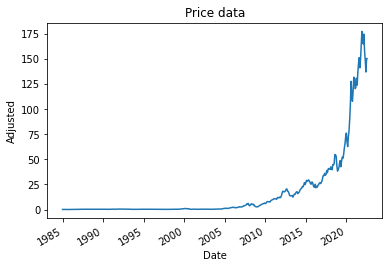

In [32]:
# chart the closing price
stock['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted")
plt.title("Price data")
plt.show()

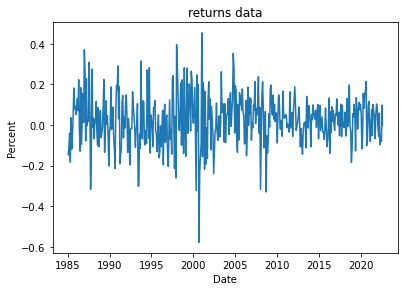

In [33]:

# plot it
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("returns data")
plt.show()


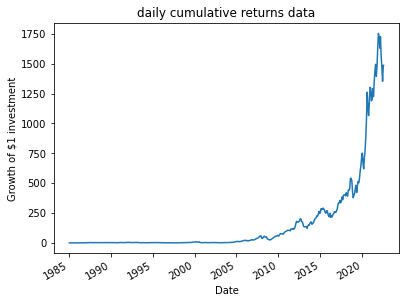

In [9]:
# get cumulative returns
# if you plot monthly, then the plot will be smoother..
stock_cum_returns = (stock_daily_returns + 1).cumprod()

# plot it
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
stock_cum_returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("daily cumulative returns data")
plt.show()


In [10]:
stock_daily_returns.mean()

0.024134475416025366

In [11]:
stock_daily_returns.std()

0.12351904308780125

In [12]:
annualized_vol = stock_monthly_returns.std()*np.sqrt(12)
annualized_vol

0.42834052400140377

In [57]:
n_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months) - 1
return_per_month

0.01573337226546423

In [58]:
annualized_return = (returns+1).prod()**(12/n_months) - 1
annualized_return

0.20602596764701597

In [59]:
annualized_return/annualized_vol

0.48110760871644387

In [60]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

0.4110522247940553

<AxesSubplot:xlabel='Date'>

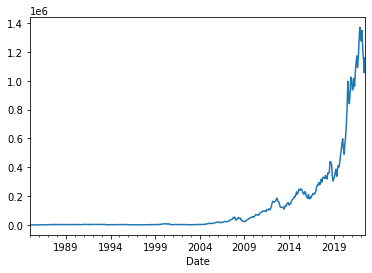

In [61]:
# wealth index
wealth_index = 1000*(1+returns).cumprod()
wealth_index.plot()

<AxesSubplot:xlabel='Date'>

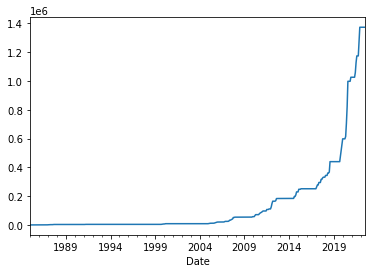

In [62]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

<AxesSubplot:xlabel='Date'>

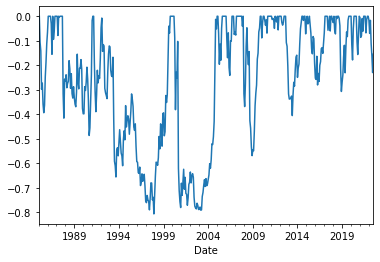

In [63]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()